### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
data_clean = data.drop(columns=['car'])
data_clean = data_clean.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
print(data_clean.isnull().sum())
data_clean['Decision'] = data_clean['Y'].map({1: 'Accepted', 0: 'Rejected'})

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [11]:
total_acceptance_rate = data_clean['Y'].mean()
total_accepted = data_clean['Y'].sum()
total_observations = len(data_clean)

print(f"Total Observations: {total_observations}")
print(f"Total Accepted: {total_accepted}")
print(f"Proportion of total observations that accepted the coupon: {total_acceptance_rate:.2%}")

Total Observations: 12079
Total Accepted: 6877
Proportion of total observations that accepted the coupon: 56.93%


5. Use a bar plot to visualize the `coupon` column.

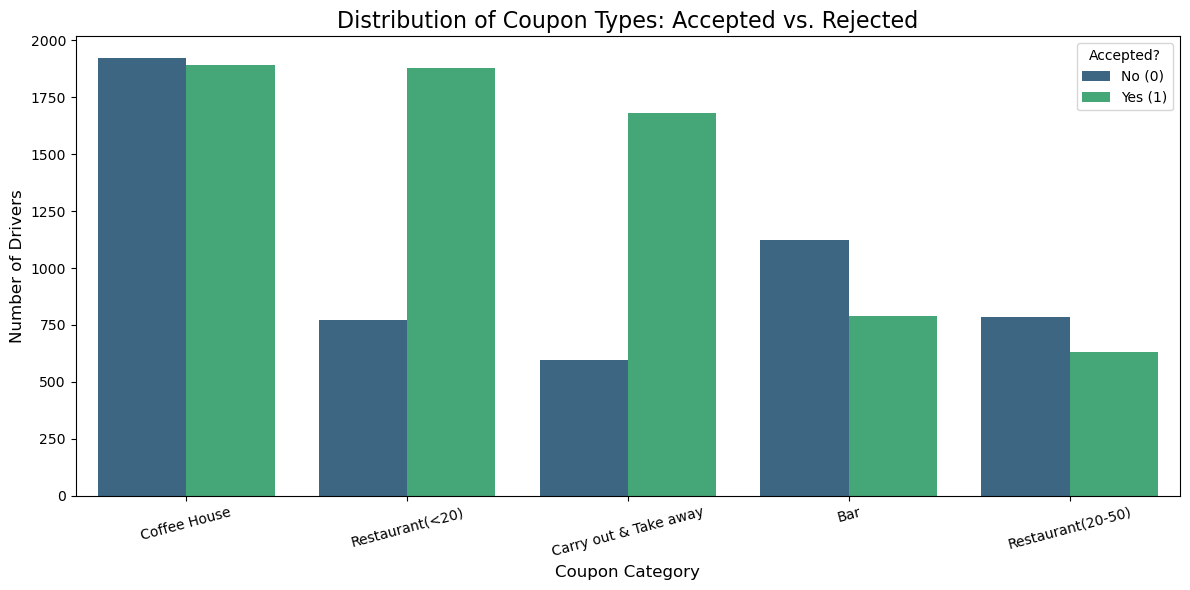

In [12]:
# Set the figure size for readability
plt.figure(figsize=(12, 6))

# Create the bar plot (countplot)
# 'data_clean' is the dataframe from our previous cleaning steps
sns.countplot(data=data_clean, 
              x='coupon', 
              hue='Y', 
              palette='viridis', 
              order=data_clean['coupon'].value_counts().index)

# Add human-readable labels and a descriptive title
plt.title('Distribution of Coupon Types: Accepted vs. Rejected', fontsize=16)
plt.xlabel('Coupon Category', fontsize=12)
plt.ylabel('Number of Drivers', fontsize=12)

# Improve the legend and axis labels
plt.legend(title='Accepted?', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=15) # Rotates labels slightly to prevent overlapping

# Show the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

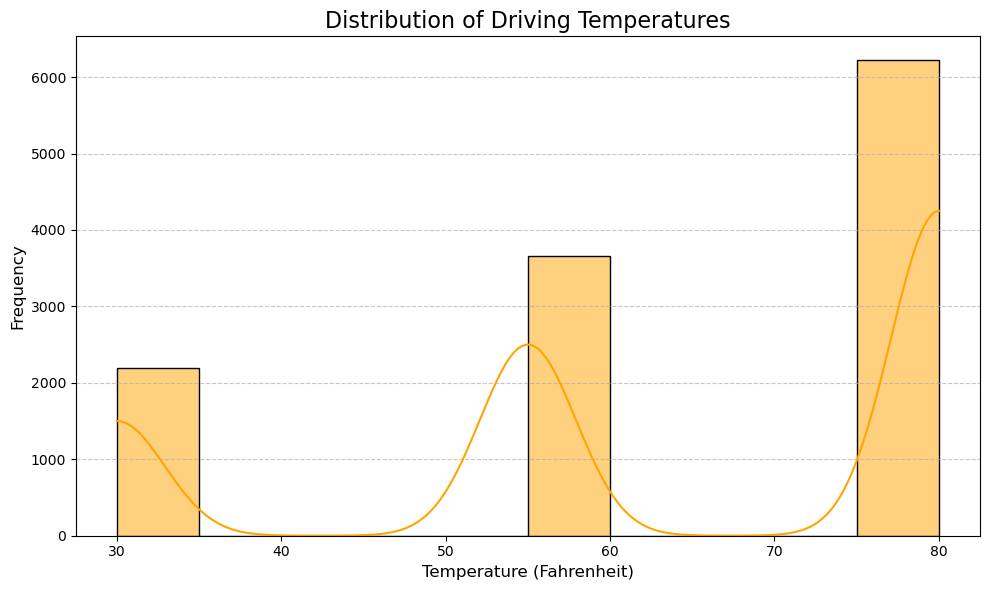

In [13]:
plt.figure(figsize=(10, 6))

# Create the histogram
# We use 'bins' to define the intervals and 'kde=True' to show a density curve
sns.histplot(data=data_clean, 
             x='temperature', 
             bins=10, 
             kde=True, 
             color='orange')

# Add descriptive titles and labels
plt.title('Distribution of Driving Temperatures', fontsize=16)
plt.xlabel('Temperature (Fahrenheit)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Ensure the plot is legible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
bar_df = data_clean.query('coupon == "Bar"').copy()



2. What proportion of bar coupons were accepted?


In [17]:
# Calculate proportion accepted
bar_acceptance = bar_df['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance:.2%}")

Proportion of bar coupons accepted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
three_or_fewer = ['never', 'less1', '1~3']
more_than_three = ['4~8', 'gt8']

rate_low = bar_df[bar_df['Bar'].isin(three_or_fewer)]['Y'].mean()
rate_high = bar_df[bar_df['Bar'].isin(more_than_three)]['Y'].mean()

print(f"Acceptance rate (<=3 visits): {rate_low:.2%}")
print(f"Acceptance rate (>3 visits): {rate_high:.2%}")

Acceptance rate (<=3 visits): 37.27%
Acceptance rate (>3 visits): 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
over25_frequent = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~bar_df['age'].isin(['below21', '21']))
]

# All others
others = bar_df[~bar_df.index.isin(over25_frequent.index)]

print(f"Frequent bar-goers > 25: {over25_frequent['Y'].mean():.2%}")
print(f"All others: {others['Y'].mean():.2%}")

Frequent bar-goers > 25: 68.98%
All others: 33.77%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [20]:
complex_filter = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_df['passanger'] != 'Kid(s)') &
    (bar_df['occupation'] != 'Farming Fishing & Forestry')
]

print(f"Acceptance rate (Complex Habits): {complex_filter['Y'].mean():.2%}")

Acceptance rate (Complex Habits): 70.94%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [21]:
condition_1 = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_df['passanger'] != 'Kid(s)') & 
    (bar_df['maritalStatus'] != 'Widowed')
]

# 2. Frequent bar-goers under 30
condition_2 = bar_df[
    (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_df['age'].isin(['below21', '21', '26']))
]

# 3. Frequent cheap restaurant goers (>4/mo) and income < 50k
condition_3 = bar_df[
    (bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (bar_df['income'].isin(['Less than $12,500', '$12,500 - $24,999', '$25,000 - $37,499', '$37,500 - $49,999']))
]

print(f"Rate Condition 1: {condition_1['Y'].mean():.2%}")
print(f"Rate Condition 2: {condition_2['Y'].mean():.2%}")
print(f"Rate Condition 3: {condition_3['Y'].mean():.2%}")

Rate Condition 1: 70.94%
Rate Condition 2: 71.95%
Rate Condition 3: nan%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Hypothesis: The primary drivers who accept bar coupons are socially active individuals who already have a habit of visiting bars. The presence of "non-kid" passengers (friends or partners) significantly increases acceptance, suggesting bar visits are viewed as a social activity rather than a solo necessity. Furthermore, younger drivers (under 30) are much more price-sensitive and responsive to these incentives compared to older or solitary drivers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [22]:
# Filter for Coffee House coupons
coffee_df = data_clean.query('coupon == "Coffee House"').copy()

# Calculate baseline acceptance
coffee_baseline = coffee_df['Y'].mean()
print(f"Baseline Coffee House acceptance rate: {coffee_baseline:.2%}")

Baseline Coffee House acceptance rate: 49.63%


C:\Users\Vishesh Grover\AppData\Local\Temp\ipykernel_7164\3884984921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_df, x='passanger', y='Y', palette='coolwarm')


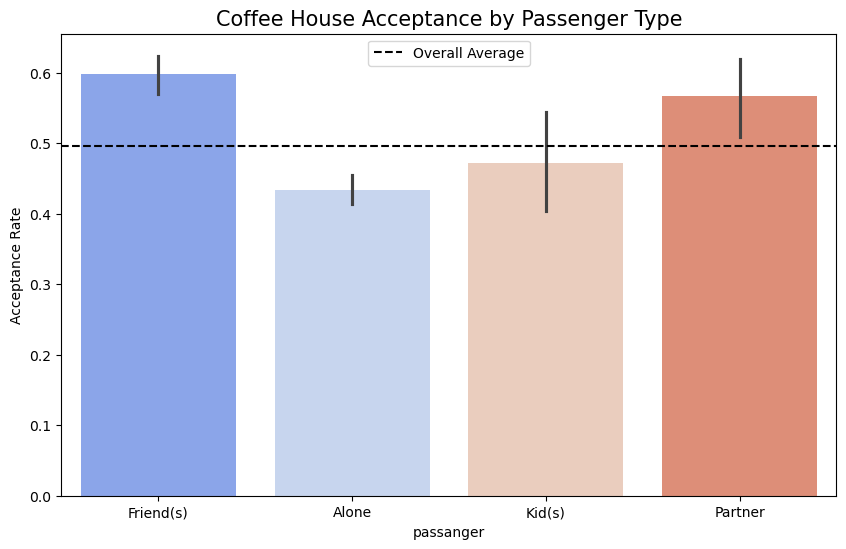

In [23]:
# Compare acceptance rates by passenger type
plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_df, x='passanger', y='Y', palette='coolwarm')
plt.axhline(coffee_baseline, color='black', linestyle='--', label='Overall Average')
plt.title('Coffee House Acceptance by Passenger Type', fontsize=15)
plt.ylabel('Acceptance Rate')
plt.legend()
plt.show()

In [24]:
# Condition: With friends/partner AND destination is NOT 'Work'
social_coffee = coffee_df[
    (coffee_df['passanger'].isin(['Friend(s)', 'Partner'])) & 
    (coffee_df['destination'] != 'Work')
]

# Condition: Driving alone to work
solo_work_coffee = coffee_df[
    (coffee_df['passanger'] == 'Alone') & 
    (coffee_df['destination'] == 'Work')
]

print(f"Acceptance rate for Social/Leisure drivers: {social_coffee['Y'].mean():.2%}")
print(f"Acceptance rate for Solo/Work-bound drivers: {solo_work_coffee['Y'].mean():.2%}")

Acceptance rate for Social/Leisure drivers: 59.14%
Acceptance rate for Solo/Work-bound drivers: 44.00%


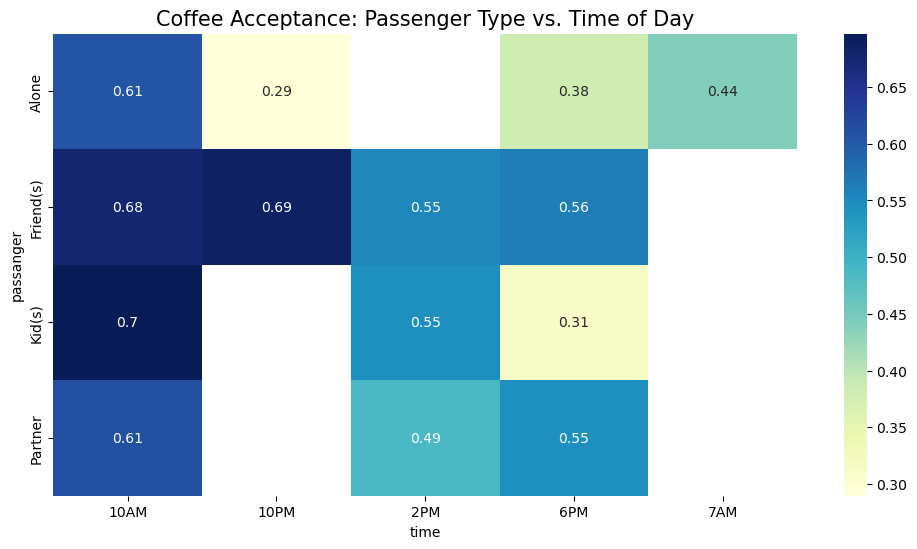

In [25]:
# Pivot data for heat map: Passenger vs Time
coffee_pivot = coffee_df.pivot_table(index='passanger', columns='time', values='Y', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(coffee_pivot, annot=True, cmap='YlGnBu')
plt.title('Coffee Acceptance: Passenger Type vs. Time of Day', fontsize=15)
plt.show()